In [2]:
import sys
import os
sys.path.insert(0, 'analysator')
#os.environ['PTNOLATEX'] = '1'
from analysator import pytools as pt
import matplotlib.pyplot as plt
import numpy as np

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.5.1


In [3]:
filename = 'data/bulk.0000015.vlsv'

In [4]:
f = pt.vlsvfile.VlsvReader(file_name=filename)

Found population proton


In [7]:
# f.list()

In [21]:

image_folder = "Plots/"

# Saves the cells of the provided file as PNG images to the folder from all 3 sides
def save_vdf_images(file, cells, folder, draw=None):
    # Documentation:
    # https://github.com/fmihpc/analysator/blob/master/pyPlots/plot_vdf.py#L278

    pt.plot.plot_vdf(filename=file, cellids=cells, outputdir=folder, slicethick=0, thick=0, scale=0, noborder=1, noxlabels=1, noylabels=1, nocb=1, title="", xz=1, draw=draw)
    pt.plot.plot_vdf(filename=file, cellids=cells, outputdir=folder, slicethick=0, thick=0, scale=0, noborder=1, noxlabels=1, noylabels=1, nocb=1, title="", xy=1, draw=draw)
    pt.plot.plot_vdf(filename=file, cellids=cells, outputdir=folder, slicethick=0, thick=0, scale=0, noborder=1, noxlabels=1, noylabels=1, nocb=1, title="", yz=1, draw=draw)

# save_vdf_images(filename, [1101], image_folder)

In [23]:

image_folder = "Plots/"

# Just to play around with the plot_vdf function
def test_vdf_files(file, cells, folder):
    # Documentation:
    # https://github.com/fmihpc/analysator/blob/master/pyPlots/plot_vdf.py#L278

    for cell in cells:
        pt.plot.plot_vdf(filename=file, cellids=[cell], slicethick=0, outputdir=folder, xz=1, draw=1)
        pt.plot.plot_vdf(filename=file, cellids=[cell], slicethick=0, outputdir=folder, xy=1, draw=1)
        pt.plot.plot_vdf(filename=file, cellids=[cell], slicethick=0, outputdir=folder, yz=1, draw=1)

# test_vdf_files(filename, [101, 1101], image_folder)

In [24]:

# List all available data files
filenames = [
    'data/bulk.0000001.vlsv',
    'data/bulk.0000002.vlsv',
    'data/bulk.0000003.vlsv',
    'data/bulk.0000004.vlsv',
    'data/bulk.0000005.vlsv',
    'data/bulk.0000006.vlsv',
    'data/bulk.0000007.vlsv',
    'data/bulk.0000008.vlsv',
    'data/bulk.0000009.vlsv',
    'data/bulk.0000010.vlsv',
    'data/bulk.0000011.vlsv',
    'data/bulk.0000012.vlsv',
    'data/bulk.0000013.vlsv',
    'data/bulk.0000014.vlsv',
    'data/bulk.0000015.vlsv'
]

all_cells = np.arange(0, 48) * 25 + 1
all_cells = all_cells.tolist()

image_folder = "Plots/run_2/"

# This will save all the cell_ids for all the bulk files to your local directory (or whichever is your default)
for index, filename in enumerate(filenames):
    print(filename)

    # save_vdf_images(filename, all_cells, image_folder)
    

data/bulk.0000001.vlsv
data/bulk.0000002.vlsv
data/bulk.0000003.vlsv
data/bulk.0000004.vlsv
data/bulk.0000005.vlsv
data/bulk.0000006.vlsv
data/bulk.0000007.vlsv
data/bulk.0000008.vlsv
data/bulk.0000009.vlsv
data/bulk.0000010.vlsv
data/bulk.0000011.vlsv
data/bulk.0000012.vlsv
data/bulk.0000013.vlsv
data/bulk.0000014.vlsv
data/bulk.0000015.vlsv


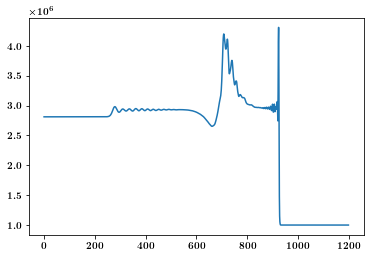

In [20]:
cellids = f.read_variable('cellid')
rho = f.read_variable('proton/vg_rho')

[xsize, ysize, zsize] = f.get_spatial_mesh_size()   
rho_shaped = rho[cellids.argsort()].reshape([ysize,xsize])

bvol = f.read_variable('vg_b_vol')
bvol_shaped = bvol[cellids.argsort()].reshape([ysize,xsize,3])

plt.plot(rho_shaped[0])
plt.show()

#plt.plot(bvol_shaped[0])
#plt.show()


In [1]:

'''
Notes from meeting

meta = load(filename)

fg_b = magnetic
fg_e = electric
rho = density


https://henry2004y.github.io/Vlasiator.jl/dev/manual/#Velocity-space-moments
-> buried inside plotting function in analysator

- henry2004y/VlasiatorMakie.jl

- cells are available for every 25
- vcellf is 3D, but it is flattened: zeros are ignored
- getdensity is mass density

- "flatten" reconstructs arrays

- clustering doesn't need to know diff between dog and cat
- image on wall had ~12 classes

- "we dont know how to use vdf information, we want to make use of them"
- "algorithm that can distinguish maxwellian vs. non-maxwellian without formula"
- "tool that binari classifies bulk files (that contain the VDFs)


- https://github.com/fmihpc/analysator/blob/master/pyPlots/plot_vdf.py

'''





'\nNotes from meeting\n\nmeta = load(filename)\n\nfg_b = magnetic\nfg_e = electric\nrho = density\n\n\nhttps://henry2004y.github.io/Vlasiator.jl/dev/manual/#Velocity-space-moments\n-> buried inside plotting function in analysator\n\n- henry2004y/VlasiatorMakie.jl\n\n- cells are available for every 25\n- vcellf is 3D, but it is flattened: zeros are ignored\n- getdensity is mass density\n\n- "flatten" reconstructs arrays\n\n- clustering doesn\'t need to know diff between dog and cat\n- image on wall had ~12 classes\n\n- "we dont know how to use vdf information, we want to make use of them"\n- "algorithm that can distinguish maxwellian vs. non-maxwellian without formula"\n- "tool that binari classifies bulk files (that contain the VDFs)\n\n\n- https://github.com/fmihpc/analysator/blob/master/pyPlots/plot_vdf.py\n\n'

In [3]:
import numpy as np

from juliacall import Main as jl

jl.seval("using Vlasiator")
# jl.seval("using PyPlot")

filename = 'data/bulk.0000015.vlsv'

meta = jl.load(filename)

print("✅ Everything loaded")

✅ Everything loaded


In [4]:
print(meta)

File: bulk.0000015.vlsv
Time: 150.04
Dimension: 1
Maximum AMR level: 0
Contains VDF: true
Variables: ["CellID", "fg_b", "fg_e", "proton/vg_blocks", "proton/vg_rho_nonthermal", "proton/vg_v_nonthermal", "proton/vg_ptensor_nonthermal_diagonal", "proton/vg_ptensor_nonthermal_offdiagonal", "proton/vg_rho_thermal", "proton/vg_v_thermal", "proton/vg_ptensor_thermal_diagonal", "proton/vg_ptensor_thermal_offdiagonal", "proton/vg_ptensor_diagonal", "proton/vg_ptensor_offdiagonal", "proton/vg_rho", "proton/vg_v", "vg_b_vol", "vg_boundarytype", "vg_f_saved", "vg_rank"]



In [9]:
cellid = 1

vcellids, vcellf = jl.readvcells(meta, cellid, species="proton")
# Recover the full VDF space
f = jl.Vlasiator.flatten(meta.meshes["proton"], vcellids, vcellf)


In [26]:
print(type(f))
print(len(f))
print(f.shape)

# np.reshape(2,3,4,5)

rho = np.array(np.array(f))

<class 'juliacall.ArrayValue'>
153990656
(536, 536, 536)


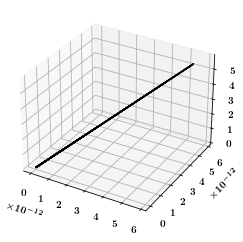

In [60]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix

X = rho[256]
Y = rho[256]
Z = rho[256]

# Trying to get around some 3D plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')

#print(rho[256][256])
# df = pd.DataFrame(rho)

#plt.plot(rho[256][256])
#plt.show()

(30, 30)
(30, 30)
(30, 30)
[-6.         -5.5862069  -5.17241379 -4.75862069 -4.34482759 -3.93103448
 -3.51724138 -3.10344828 -2.68965517 -2.27586207 -1.86206897 -1.44827586
 -1.03448276 -0.62068966 -0.20689655  0.20689655  0.62068966  1.03448276
  1.44827586  1.86206897  2.27586207  2.68965517  3.10344828  3.51724138
  3.93103448  4.34482759  4.75862069  5.17241379  5.5862069   6.        ]
(536, 536, 536)


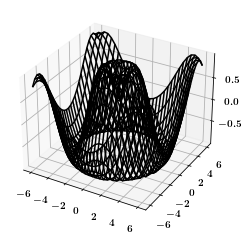

In [86]:
# Test 3D plotting with sample data
def make_z(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = make_z(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')

print(X.shape)
print(Y.shape)
print(Z.shape)

print(X[0])

print(rho.shape)

In [80]:

# Trying some naive reshaping of vdf data

length = len(rho)

new_arr = np.empty([length, length])

for i, val_i in enumerate(rho):
    new_arr[i] = np.empty(length)
    
    for j, val_j in enumerate(val_i):
        new_arr[i][j] = max(val_j)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
